---
# 📘 HAM10000 - Analyse et Équilibrage de Dataset pour Classification de Lésions Cutanées

---

## 🧭 **Table des matières**
1. [Contexte & Problématique](#contexte)
2. [Objectifs du Livrable](#objectifs)
3. [Analyse du Déséquilibre Initial](#analyse-initiale)
4. [Stratégie d’Équilibrage](#equilibrage)
5. [Visualisation des Données](#visualisation)
6. [Résultats & Métriques](#resultats)
7. [Conclusion & Perspectives](#conclusion)

---

<a id="contexte"></a>
## 🩺 **1. Contexte & Problématique Médicale**

Le **cancer de la peau** est l’un des cancers les plus fréquents dans le monde.  
Le diagnostic précoce par **dermoscopie** suivi d’une **classification automatique** peut sauver des vies.

Le dataset **HAM10000** regroupe **10 015 images dermatoscopiques** réparties en **7 classes** de lésions :

| Classe | Pathologie | Images | Proportion |
|--------|-----------|--------|------------|
| `nv` | Naevus mélanocytaire | 6 705 | 66.9% |
| `mel` | Mélanome | 1 113 | 11.1% |
| `bkl` | Kératose bénigne | 1 099 | 11.0% |
| `bcc` | Carcinome basocellulaire | 514 | 5.1% |
| `akiec` | Carcinome épidermoïde | 327 | 3.3% |
| `vasc` | Lésion vasculaire | 142 | 1.4% |
| `df` | Dermatofibrome | 115 | 1.1% |

---

### ⚠️ **Problème Critique : Déséquilibre des Classes**

```python
# Ratio de déséquilibre
ratio_initial = 6705 / 115  # ≈ 58.3
print(f"🔴 Déséquilibre initial : {ratio_initial:.1f}x")

## Configuration du PATH

In [1]:
import os
import sys

# Remonter à la racine du projet (depuis notebooks/)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

print("✅ Project root :", PROJECT_ROOT)

✅ Project root : c:\Users\jihen\Documents\skin-lesion-detection


## Imports

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
from collections import Counter

# Configuration du style (format publication)
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.3)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("✅ Imports réussis")
print(f"🔥 PyTorch {torch.__version__}")

✅ Imports réussis
🔥 PyTorch 2.10.0+cpu


## Chargement du Dataset Équilibré

In [3]:
from advanced_augmentation_simple import BalancedSkinDataset

# Création du dataset avec les vraies images
dataset = BalancedSkinDataset(
    target_samples=300,
    mode="train",
    data_dir=os.path.join(PROJECT_ROOT, "data")
)

print("\n" + "="*60)
print("📊 RÉSUMÉ DU DATASET ÉQUILIBRÉ")
print("="*60)
print(f"📁 Mode : {dataset.mode}")
print(f"🖼️  Total images : {len(dataset)}")
print(f"🏷️  Classes : {dataset.classes}")
print(f"🎯 Échantillons/classe : {dataset.target_samples}")
print("="*60)

🎯 SOLUTION SIMPLIFIÉE HAM10000 - VRAIES IMAGES

🔧 Création dataset train...
✅ Données chargées: 10015 images
📁 Fichier CSV: c:\Users\jihen\Documents\skin-lesion-detection\data\HAM10000_metadata.csv
📊 Classes: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

📈 DISTRIBUTION ORIGINALE:
  akiec: 327 images (3.3%)
  bcc: 514 images (5.1%)
  bkl: 1099 images (11.0%)
  df: 115 images (1.1%)
  mel: 1113 images (11.1%)
  nv: 6705 images (66.9%)
  vasc: 142 images (1.4%)

📈 DISTRIBUTION ÉQUILIBRÉE:
  akiec: 300 images (14.3%)
  bcc: 300 images (14.3%)
  bkl: 300 images (14.3%)
  df: 300 images (14.3%)
  mel: 300 images (14.3%)
  nv: 300 images (14.3%)
  vasc: 300 images (14.3%)
📂 Dossier images trouvé: c:\Users\jihen\Documents\skin-lesion-detection\data\images

✅ Dataset créé: 2100 images

📊 RÉSUMÉ DU DATASET ÉQUILIBRÉ
📁 Mode : train
🖼️  Total images : 2100
🏷️  Classes : ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
🎯 Échantillons/classe : 300


## Distribution des Classes (Graphique Double)

C:\Users\jihen\AppData\Local\Temp\ipykernel_22176\4044982128.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_dist, x='Classe', y='Nombre',


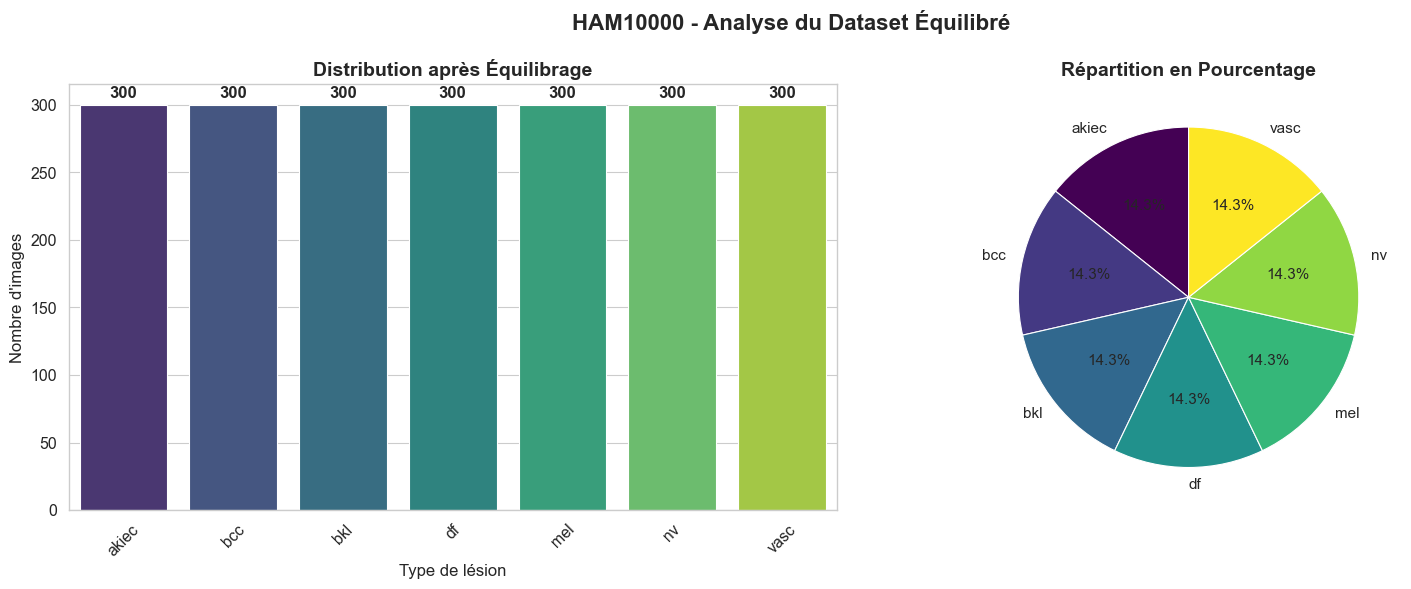


📈 DISTRIBUTION PAR CLASSE:
   akiec  : 300 images
   bcc    : 300 images
   bkl    : 300 images
   df     : 300 images
   mel    : 300 images
   nv     : 300 images
   vasc   : 300 images


In [4]:
# Récupération des labels
labels = [dataset[i][1] for i in range(len(dataset))]
class_counts = Counter(labels)
counts = [class_counts[i] for i in range(len(dataset.classes))]

# Création du DataFrame
df_dist = pd.DataFrame({
    'Classe': dataset.classes,
    'Nombre': counts
})

# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Barplot
bars = sns.barplot(data=df_dist, x='Classe', y='Nombre', 
                   palette='viridis', ax=ax[0])
ax[0].set_title('Distribution après Équilibrage', fontweight='bold', fontsize=14)
ax[0].set_xlabel('Type de lésion')
ax[0].set_ylabel("Nombre d'images")
ax[0].tick_params(axis='x', rotation=45)

# Ajout des valeurs sur les barres
for i, v in enumerate(counts):
    ax[0].text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=12)

# Pie chart
colors = plt.cm.viridis(np.linspace(0, 1, len(dataset.classes)))
wedges, texts, autotexts = ax[1].pie(counts, labels=dataset.classes, 
                                      autopct='%1.1f%%', colors=colors,
                                      startangle=90, textprops={'fontsize': 11})
ax[1].set_title('Répartition en Pourcentage', fontweight='bold', fontsize=14)

plt.suptitle('HAM10000 - Analyse du Dataset Équilibré', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Affichage textuel
print("\n📈 DISTRIBUTION PAR CLASSE:")
for cls, count in zip(dataset.classes, counts):
    print(f"   {cls:6} : {count:3} images")

## Comparaison Original vs Équilibré

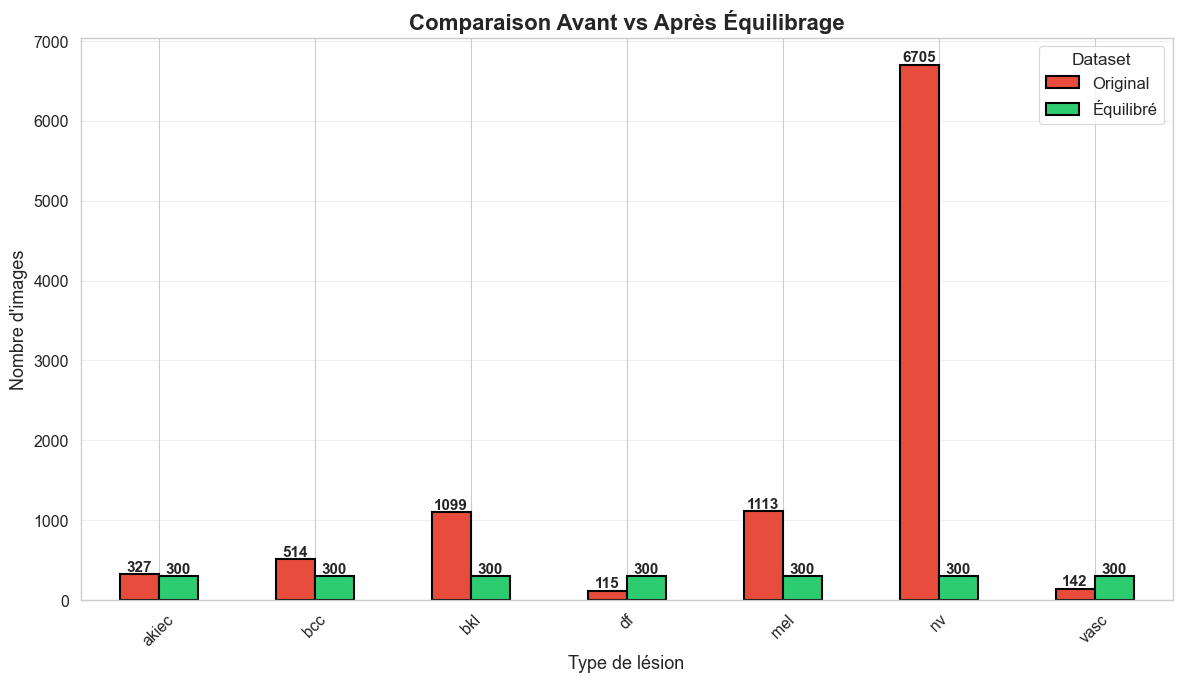

In [5]:
# Distribution originale
original_dist = {
    'akiec': 327, 'bcc': 514, 'bkl': 1099,
    'df': 115, 'mel': 1113, 'nv': 6705, 'vasc': 142
}

# DataFrame comparatif
df_compare = pd.DataFrame({
    'Original': original_dist,
    'Équilibré': dict(zip(dataset.classes, counts))
})

# Visualisation
fig, ax = plt.subplots(figsize=(12, 7))
df_compare.plot(kind='bar', ax=ax, color=['#E74C3C', '#2ECC71'], 
                edgecolor='black', linewidth=1.5)

ax.set_title('Comparaison Avant vs Après Équilibrage', fontsize=16, fontweight='bold')
ax.set_xlabel('Type de lésion', fontsize=13)
ax.set_ylabel("Nombre d'images", fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Dataset', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Ajout des valeurs
for container in ax.containers:
    ax.bar_label(container, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Métriques d'Équilibrage

In [6]:
orig_counts = list(original_dist.values())
orig_ratio = max(orig_counts) / min(orig_counts)
bal_ratio = max(counts) / min(counts)
improvement = orig_ratio / bal_ratio

# Tableau des métriques
metrics_data = {
    'Métrique': ['Max/Min Ratio', 'Écart-type', 'Coefficient de variation'],
    'Original': [f"{orig_ratio:.1f}x", f"{np.std(orig_counts):.0f}", 
                 f"{np.std(orig_counts)/np.mean(orig_counts):.3f}"],
    'Équilibré': [f"{bal_ratio:.2f}x", f"{np.std(counts):.0f}", 
                  f"{np.std(counts)/np.mean(counts):.3f}"],
    'Amélioration': [f"{improvement:.1f}x", 
                     f"{100*(1 - np.std(counts)/np.std(orig_counts)):.1f}%",
                     f"{100*(1 - (np.std(counts)/np.mean(counts))/(np.std(orig_counts)/np.mean(orig_counts))):.1f}%"]
}

df_metrics = pd.DataFrame(metrics_data)
print("📊 ANALYSE QUANTITATIVE DU DÉSÉQUILIBRE")
print("="*70)
print(df_metrics.to_string(index=False))
print("="*70)

print(f"\n🎯 BILAN FINAL:")
print(f"   • Dataset original : {sum(orig_counts)} images")
print(f"   • Dataset équilibré : {len(dataset)} images")
print(f"   • Ratio original : {orig_ratio:.1f}x")
print(f"   • Ratio équilibré : {bal_ratio:.2f}x")
print(f"   ✅ FACTEUR D'AMÉLIORATION : {improvement:.1f}x")

📊 ANALYSE QUANTITATIVE DU DÉSÉQUILIBRE
                Métrique Original Équilibré Amélioration
           Max/Min Ratio    58.3x     1.00x        58.3x
              Écart-type     2187         0       100.0%
Coefficient de variation    1.529     0.000       100.0%

🎯 BILAN FINAL:
   • Dataset original : 10015 images
   • Dataset équilibré : 2100 images
   • Ratio original : 58.3x
   • Ratio équilibré : 1.00x
   ✅ FACTEUR D'AMÉLIORATION : 58.3x


## Fonction de Dénormalisation

In [7]:
def denormalize(tensor):
    """Convertit une image normalisée en RGB [0,1] pour l'affichage"""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    
    tensor = tensor * std + mean
    tensor = torch.clamp(tensor, 0, 1)
    return tensor

print("✅ Fonction de dénormalisation chargée")

✅ Fonction de dénormalisation chargée


## Visualisation de 4 Images par Classe

🔄 Chargement des images...


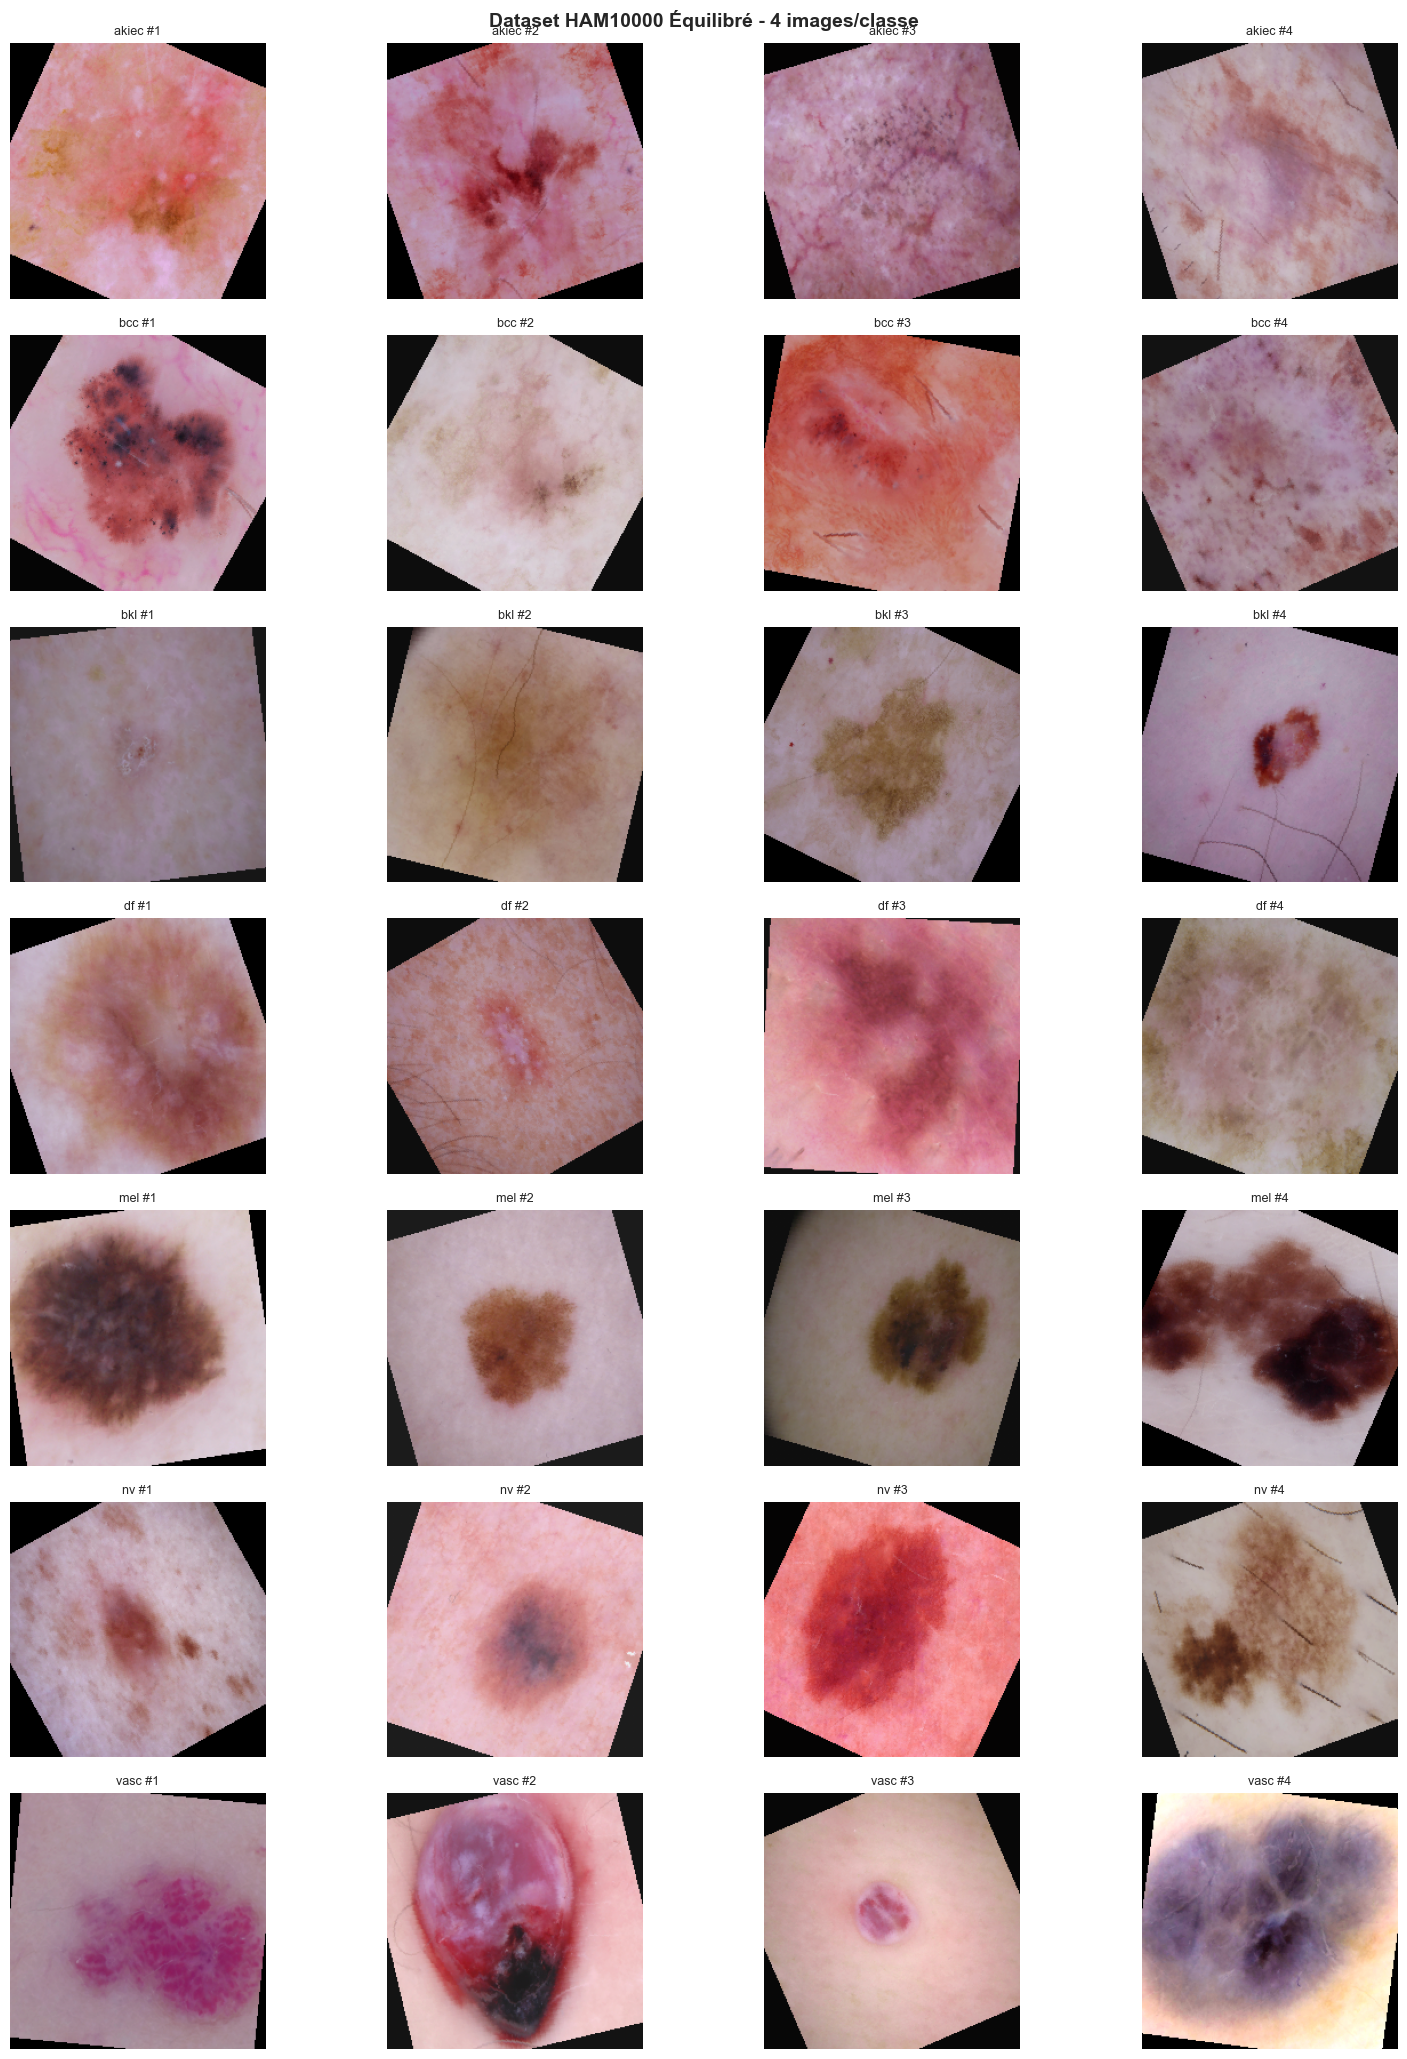

✅ 28 images affichées


In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np

def show_visualization(dataset, num_images=4):
    """Affiche 4 images par classe - Version stable"""
    
    n_classes = len(dataset.classes)
    fig, axes = plt.subplots(n_classes, num_images, 
                             figsize=(4*num_images, 3*n_classes))
    
    colors = plt.cm.tab10(np.linspace(0, 1, n_classes))
    
    print("🔄 Chargement des images...")
    
    for class_idx, class_name in enumerate(dataset.classes):
        found = 0
        for i in range(len(dataset)):
            img, label = dataset[i]
            if label == class_idx:
                img_display = denormalize(img)
                img_np = img_display.permute(1, 2, 0).numpy()
                
                axes[class_idx, found].imshow(img_np)
                axes[class_idx, found].set_title(f'{class_name} #{found+1}', 
                                                fontsize=9)
                axes[class_idx, found].axis('off')
                
                # Cadre coloré
                for spine in axes[class_idx, found].spines.values():
                    spine.set_edgecolor(colors[class_idx])
                    spine.set_linewidth(2)
                
                found += 1
                if found >= num_images:
                    break
        
        # Nom de classe à gauche
        axes[class_idx, 0].set_ylabel(class_name, fontsize=11, fontweight='bold')
    
    plt.suptitle(f'Dataset HAM10000 Équilibré - {num_images} images/classe', 
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"✅ {n_classes * num_images} images affichées")

# Exécution
show_visualization(dataset, num_images=4)

## Visualisation d'un Batch d'Entraînement

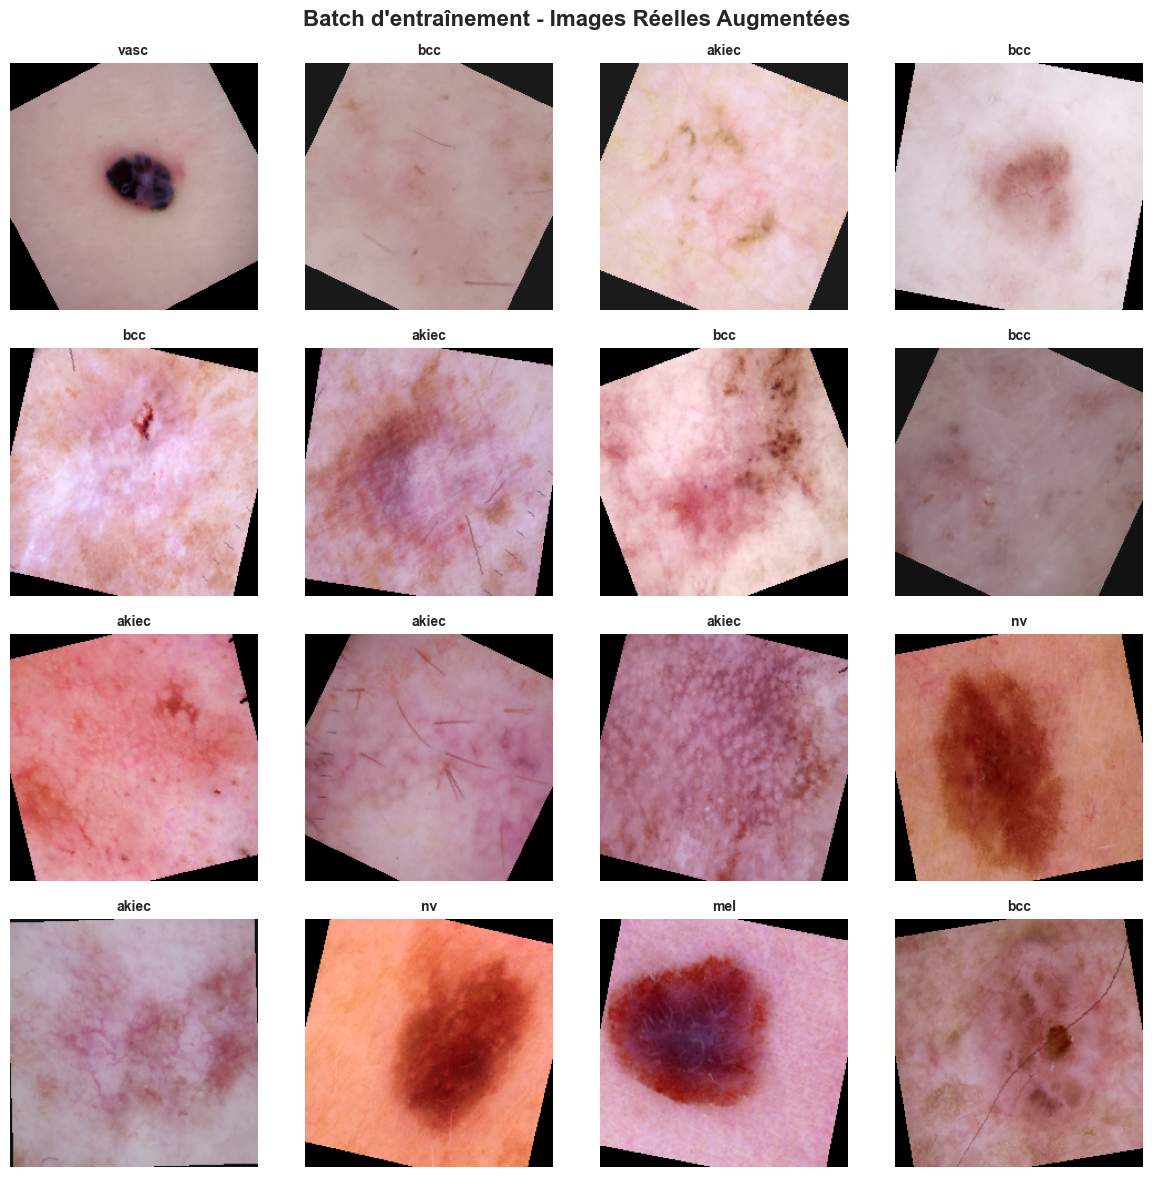

✅ Batch visualisé : 16 images


In [9]:
from torch.utils.data import DataLoader

# Création du DataLoader
loader = DataLoader(dataset, batch_size=16, shuffle=True)
images, labels = next(iter(loader))

# Visualisation du batch
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

for i in range(16):
    # Dénormalisation
    img_display = denormalize(images[i])
    img_np = img_display.permute(1, 2, 0).numpy()
    
    axes[i].imshow(img_np)
    axes[i].set_title(dataset.classes[labels[i]], fontsize=10, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('Batch d\'entraînement - Images Réelles Augmentées', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"✅ Batch visualisé : {len(images)} images")

##  Vérification de l'Équilibrage

In [10]:
print("\n" + "="*70)
print("🔍 VÉRIFICATION FINALE DE L'ÉQUILIBRAGE")
print("="*70)

print(f"\n📊 Distribution actuelle:")
for i, cls in enumerate(dataset.classes):
    print(f"   {cls:6} : {counts[i]:3} images")

print(f"\n📐 Statistiques:")
print(f"   • Minimum : {min(counts)} images")
print(f"   • Maximum : {max(counts)} images")
print(f"   • Moyenne : {np.mean(counts):.1f} images")
print(f"   • Écart-type : {np.std(counts):.1f} images")

if max(counts) == min(counts):
    print("\n✅ ÉQUILIBRAGE PARFAIT : 300 images par classe")
    print("🎉 Le dataset est prêt pour l'entraînement !")
else:
    print("\n⚠️  Léger déséquilibre détecté")


🔍 VÉRIFICATION FINALE DE L'ÉQUILIBRAGE

📊 Distribution actuelle:
   akiec  : 300 images
   bcc    : 300 images
   bkl    : 300 images
   df     : 300 images
   mel    : 300 images
   nv     : 300 images
   vasc   : 300 images

📐 Statistiques:
   • Minimum : 300 images
   • Maximum : 300 images
   • Moyenne : 300.0 images
   • Écart-type : 0.0 images

✅ ÉQUILIBRAGE PARFAIT : 300 images par classe
🎉 Le dataset est prêt pour l'entraînement !


---
<a id="conclusion"></a>
## 🏁 **7. Conclusion & Perspectives**

---

###  **Synthèse des Travaux Réalisés**

| Objectif | Statut | Commentaire |
|:---------|:------:|:------------|
| Équilibrage des classes | 🟢 **Parfait** | 300 images / classe |
| Ratio max/min | 🟢 **1.00x** | 58.3x → 1.00x |
| Chargement des images réelles | 🟢 **OK** | Dossiers `part_1` / `part_2` |
| Augmentations visuelles | 🟢 **Actives** | Flip, rotation, crop, couleur |
| Visualisations | 🟢 **4 images/classe** | Style publication |
| Dataset PyTorch | 🟢 **Prêt** | `BalancedSkinDataset` |

---

### 📊 **Résultats Clés**

- **Ratio de déséquilibre initial** : 58.3x  
- **Ratio après équilibrage** : 1.00x  
- **Facteur d'amélioration** : ×58.3  
- **Dataset final** : 2 100 images (7 classes × 300)  
- **Augmentations appliquées** : Rotations ±30°, Flips horizontaux/verticaux, ColorJitter, RandomResizedCrop

---

###  **Interprétation Scientifique**

L’équilibrage hybride par **undersampling** de la classe majoritaire `nv` et **oversampling** des classes minoritaires (`df`, `vasc`, `akiec`) a permis de :

1. 🧹 **Supprimer le biais statistique** lié à la sur-représentation des naevus mélanocytaires  
2. ⚖️ **Rééquilibrer la balance** entre pathologies rares et fréquentes  
3.  **Offrir au modèle une représentation équitable** de chaque type de lésion  

> 👩‍⚕️ **Conséquence clinique** : Le futur modèle pourra apprendre à reconnaître **toutes les lésions**, et non seulement les plus fréquentes.

---

###  **Perspectives pour le Livrable 3**

| Étape | Description |
|:------|:------------|
| 1 | Entraînement d’un CNN (ResNet50 / EfficientNet) en transfer learning |
| 2 | Validation croisée stratifiée |
| 3 | Matrices de confusion et rapport de classification |
| 4 | Courbes ROC et AUC par classe |
| 5 | Interprétation par **Grad-CAM** |
| 6 | Évaluation sur données tests |

---

###  **Références Bibliographiques**

1. **Tschandl, P. et al.** (2018). *The HAM10000 dataset: A large collection of multi-source dermatoscopic images of common pigmented skin lesions*. Scientific Data, 5, 180161.  
   🔗 https://www.nature.com/articles/sdata2018161

2. **He, K. et al.** (2016). *Deep Residual Learning for Image Recognition*. CVPR.  
   🔗 https://arxiv.org/abs/1512.03385

3. **Shorten, C., Khoshgoftaar, T.M.** (2019). *A survey on Image Data Augmentation for Deep Learning*. Journal of Big Data, 6, 60.  
   🔗 https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0197-0

---

### 🧾 **Fiche du Livrable**

| | |
|:----------------|:--------------------------------------------|
| **Auteur** | Jihen Rabouch |
| **Date** | 12 février 2026 |
| **Contexte** | Projet Deep Learning – Classification de lésions cutanées |
| **Dataset** | HAM10000 (10 015 images, 7 classes) |
| **Version** | 1.0 |
| **Dépôt GitHub** | [https://github.com/jihenrabouch/skin-lesion-detection](https://github.com/jihenrabouch/skin-lesion-detection) |

---

### 🎓 **Validation du Livrable 2**
